<a href="https://colab.research.google.com/github/MoSkibidi/The_Art_Of_Computer_System/blob/main/joy_compiler_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การพัฒนา Joy Compiler (เฟส 1)

เราจะเรียนรู้กระบวนการพัฒนาคอมไพเลอร์แบบรวบรัด ผ่านภาษาโปรแกรมอย่างง่ายที่ชื่อว่า "ภาษาจอย" (Joy language - ได้รับตั้งชื่อโดย ผศ.เฉลิมศักดิ์ ฉัตรดอกไม้ไพร) โดยแบ่งการพัฒนาออกเป็น 4 เฟสดังนี้

**เฟส 1: Joy 0.5**
* รองรับการประกาศและกำหนดค่าให้ตัวแปรแบบโกลบอล
* รองรับการระบุนิพจน์ในรูปตัวแปรและจำนวนเต็ม (ข้อมูลทุกประเภทในภาษาจอยเป็นข้อมูลขนาด 16 บิต จึงไม่มีการระบุประเภทข้อมูลเวลาประกาศใช้งานตัวแปร)
* รองรับการควบคุมโปรแกรมโฟลว์ด้วยโครงสร้าง `if` และ `if..else`

**เฟส 2: Joy 1.0**
* รองรับการสร้างนิพจน์ทางคณิตศาสตร์ที่ประกอบด้วยตัวดำเนินการ `+`, `-` (ทั้ง binary และ unary), `()`
* รองรับการสร้างนิพจน์จากตัวดำเนินการเปรียบเทียบ: `>`,`<`,`==`,`!=`,`>=`,`<=`
<br/>(นิพจน์เหล่านี้ให้ค่าเป็น 0 หรือ 1 เนื่องจากภาษาจอยมีข้อมูลประเภทเดียวคือจำนวนเต็ม)
* รองรับการควบคุมโปรแกรมโฟลว์ด้วยโครงสร้าง `while` และ `until`

**เฟส 3: Joy 2.0**
* รองรับคอมเม้นต์แบบบรรทัดเดียว
* รองรับ literal integer ในรูปเลขฐานสอง และฐานสิบหก
* รองรับการอ้างถึงหน่วยความจำในรูปพอยเตอร์ เพื่อนำไปใช้งานกับสตริง อาร์เรย์ และอินพุทเอาท์พุทในรูปแบบ memory-mapped I/O
* รองรับการสร้างสตริง และอาร์เรย์

**เฟส 4: Joy 3.0**
* รองรับการสร้างและการเรียกใช้งานฟังก์ชัน<u>แบบไม่รีเคอร์ซีฟ</u> รวมถึงการตรวจสอบความถูกต้องของการเรียกฟังก์ชัน
* รองรับการอ้างถึงตัวแปรทั้งแบบ local และ global scope
* รองรับตัวดำเนินการคูณและหาร: `*`, `/`, `%` โดยนิยามโค้ดประมวลผลนิพจน์เหล่านี้ในรูป Joy runtime แทนการใช้ภาษาแอสเซมบลี้
* รองรับการกำหนดลำดับความสำคัญของตัวดำเนินการ (operator precedence)

# กระบวนการแปลภาษาโปรแกรม

คอมไพเลอร์ที่เราจะพัฒนาขึ้นมีหน้าที่ในการแปลซอร์สโค้ดภาษาจอย ให้กลายเป็นโค้ดเป้าหมายในภาษา Hack Assembly คอมไพเลอร์โดยทั่วไปจะมีองค์ประกอบตามรูปด้านล่าง โดย lexical analyzer (หรือเล็กเซอร์ - lexer) ทำหน้าที่ในการตัดคำให้เป็นสายโทเค็น ซึ่งถูก syntax analyzer (หรือพาร์เซอร์ - parser) นำมาประกอบให้เป็นโครงสร้างตามไวยากรณ์ของภาษา โครงสร้างที่ได้แม้จะถูกไวยากรณ์ แต่อาจผิดความหมายการใช้งาน เช่น เรียกฟังก์ชันด้วยอาร์กิวเมนต์ไม่ครบ หรือใช้ตัวแปรผิดประเภท ซึ่งเป็นหน้าที่ของ semantic analyzer ที่จะวิเคราะห์และตรวจสอบความหมายเหล่านี้ ขั้นตอนถัดไปคือส่งให้ code generator สร้างโค้ดภาษาแอสเซมบลี้ออกมา ซึ่งโค้ดที่ได้อาจมีคำสั่งที่ทำงานซ้ำซ้อนโดยไม่จำเป็น ส่วน code optimizer จะวิเคราะห์ความซ้ำซ้อนและตัดโค้ดภาษาแอสเซมบลี้บางคำสั่งออก หรือแทนด้วยชุดคำสั่งที่มีประสิทธิภาพมากขึ้น จนได้โค้ดภาษาแอสเซมบลี้ผลลัพธ์ออกมาในที่สุด

![compiler.png](https://ecourse.cpe.ku.ac.th/courses/comsys/pics/compiler-full.png)

ในรายวิชานี้เราจะสร้างเล็กเซอร์และพาร์เซอร์จากไลบรารีที่ชื่อว่า Lark และข้ามส่วนที่เป็น sematic analyzer และ code optimizer ไป ดังนั้นส่วนที่เราจะมุ่งเน้นเป็นหลักจึงเป็นการเขียนแกรมมาร์และโค้ดเจเนอเรเตอร์

![compiler-joy.png](https://ecourse.cpe.ku.ac.th/courses/comsys/pics/compiler-joy.png)


## ติดตั้งไลบรารีของรายวิชา และไลบรารี Lark

กลไกที่สำคัญด่านแรกของคอมไพเลอร์คือการทำเล็กเซอร์ (lexer รวมถึงชื่ออื่นที่ให้ความหมายเดียวกัน เช่น lexical analyzer หรือ tokenizer หรือ scanner) และพาร์เซอร์ (parser หรือ syntax analyzer) ซึ่งกระบวนการสร้างนั้นอาศัยความรู้พื้นฐานจากรายวิชา Theory of Computation แต่เพื่อให้กระชับต่อภาพรวมของเนื้อหารายวิชานี้ เราจะอาศัยซอฟต์แวร์ที่ช่วยสร้างโค้ดเล็กเซอร์และพาร์เซอร์ให้อัตโนมัติในภาษาไพทอนที่ชื่อว่า [Lark](https://lark-parser.readthedocs.io/en/latest/)

In [ ]:
%%capture
!rm -rf comp-sys-public-lib
!wget -q -O - https://ecourse.cpe.ku.ac.th/courses/comsys/lib/ch07.tgz | tar zxf -
!pip install lark-parser
!pip install -e comp-sys-public-lib
!pip install -e comp-sys-public-lib/modules/component-builder
import site; site.main()
from course_ch07_init import *

## นิยาม Pseudo-Instructions สำหรับกระบวนการพื้นฐาน
คำสั่งเสมือน (pseudo-instruction) ประกอบไปด้วยชุดคำสั่งภาษาเครื่องหลายคำสั่งเพื่อทำกระบวนการพื้นฐานบางอย่างที่มีการเรียกใช้งานบ่อยครั้ง ในเฟสแรกนี้เราจะนิยามคำสั่งเสมือนที่ทำหน้าที่กำหนดค่าคงที่ให้กับหน่วยความจำ และคำสั่งคัดลอกค่าจากหน่วยความจำตำแหน่งหนึ่งไปยังอีกตำแหน่งหนึ่ง

In [ ]:
def gen_load_const(mem, val):
    '''
    Generate Hack assembly to load the memory location mem with the specified
    integer val, where 0 <= val <= 32767.
    '''
    if val < 0 or val > 32767:
        raise Exception("Invalid integer literal")
    return f'''
        // [{mem}] <- {val}
        @{val}
        D=A
        @{mem}
        M=D
    '''

def gen_move(dst, src):
    '''
    Generate Hack assembly to copy the memory location src to the memory
    location dst.
    '''
    return f'''
        // [{dst}] <- [{src}]
        @{src}
        D=M
        @{dst}
        M=D
    '''

ทดลองสร้างโค้ดแอสเซมบลี้จากฟังก์ชัน pseudo-instruction ข้างต้น

In [ ]:
asm = '\n'.join([
    gen_load_const('var.a', 1234),
    gen_move('THIS', 'var.a'),
    gen_move('THAT', 'THIS'),
    gen_move('var.b', 'THAT'),
])
print(asm)


        // [var.a] <- 1234
        @1234
        D=A
        @var.a
        M=D
    

        // [THIS] <- [var.a]
        @var.a
        D=M
        @THIS
        M=D
    

        // [THAT] <- [THIS]
        @THIS
        D=M
        @THAT
        M=D
    

        // [var.b] <- [THAT]
        @THAT
        D=M
        @var.b
        M=D
    


โค้ดที่ได้แม้จะสามารถทำการ assemble ได้ แต่มีช่องไฟที่ไม่เป็นระเบียบและตรวจสอบได้ยากว่าคำสั่งใดอยู่ที่ค่า PC ตำแหน่งใด รายวิชาได้เตรียมฟังก์ชัน `listing()` เอาไว้จัดระเบียบโค้ดให้ดูง่ายขึ้น และใส่ตำแหน่งหน่วยความจำกำกับไว้ในจุดที่เป็นคำสั่งเพื่อให้เทียบเคียงกับค่าของรีจีสเตอร์ PC ได้

In [ ]:
listing(asm)

// [var.a] <- 1234
   0: @1234
   1: D=A
   2: @var.a
   3: M=D
// [THIS] <- [var.a]
   4: @var.a
   5: D=M
   6: @THIS
   7: M=D
// [THAT] <- [THIS]
   8: @THIS
   9: D=M
  10: @THAT
  11: M=D
// [var.b] <- [THAT]
  12: @THAT
  13: D=M
  14: @var.b
  15: M=D


เพื่อความสะดวกในการเทียบเคียงผลการทำงานกับซิมูเลชัน เราจะใช้ฟังก์ชัน `assemble_and_simulate` (พัฒนาโดย กฤติน นันทสมบัติ CPE36) แล้วกดปุ่ม toggle ROM เพื่อแสดงโค้ดในหน่วยความจำคำสั่งในรูปภาษาแอสเซมบลี้ต้นฉบับแทนการแสดงเป็นรหัสภาษาเครื่อง

ทดลองรันคำสั่งภาษาแอสเซมบลี้ทีละคำสั่ง สังเกตผลลัพธ์ในหน่วยความจำในตำแหน่งต่าง ๆ ต่อไปนี้
* ตำแหน่ง 3: `R3` หรือ `THIS`
* ตำแหน่ง 4: `R4` หรือ `THAT`
* ตำแหน่ง 16,17,...: พื้นที่เก็บตัวแปร



In [ ]:
assemble_and_simulate(asm)

# Joy 0.1 - constant assignment

ภาษา Joy เวอร์ชัน 0.1 รองรับโครงสร้างโปรแกรมที่ประกอบไปด้วยคำสั่งรูปแบบเดียวคือ

---
* คำสั่งกำหนดค่าคงที่ให้ตัวแปร ในรูปแบบ: `let` *var* `=` *number* `;`
---

ตัวอย่างเช่น `let a = 8;`

เรามานิยามแกรมมาร์ของ Joy 0.1 ในรูป CFG (Context-Free Grammar) กันดังนี้

In [ ]:
JOY01_GRAMMAR = r'''
    program: statements
    statements: statement*
    statement: stmt_assign
    stmt_assign: "let" ID "=" NUMBER ";"

    ID: /[_A-Za-z][_0-9A-Za-z]*/
    NUMBER: /[0-9]+/
    WS: /[ \t\f\r\n]+/
    %ignore WS
'''

แกรมมาร์ข้างต้นอธิบายได้ดังนี้
* `program` ประกอบไปด้วย `statements`
* `statements` ประกอบไปด้วย `statement` ตั้งแต่ 0 คำสั่งหรือมากกว่า (ระบุด้วย `*`)
* `statement` ที่เป็นไปได้มีเพียง `stmt_assign`
* `stmt_assign` ประกอบไปด้วยโทเค็น `let` ตามด้วยโทเค็น `ID` ตามด้วยโทเค็น `=` ตามด้วยโทเค็น `NUMBER` และปิดท้ายด้วยโทเค็น `;` (สังเกตว่าโทเค็น `let`, `=` และ `;` เป็นโทเค็นประเภท literal-string)
* โทเค็น `ID` นิยามด้วยนิพจน์เรกูลาร์ที่ครอบด้วย `/.../` ระบุว่าประกอบด้วยอักขระ 0-9 A-Z a-z _ แต่ต้องไม่ขึ้นต้นด้วยตัวเลข
* โทเค็น `NUMBER` ประกอบด้วย 0-9 เท่านั้น อย่างน้อย 1 อักขระ
* โทเค็น `WS` (whitespace) ประกอบด้วย space, tab, carriage return และ newline ตั้งแต่ 1 ตัวขึ้นไป แต่จะไม่ถูกส่งไปให้พาร์เซอร์ (ระบุด้วย `%ignore`)

กฎสำหรับ non-terminal จะใช้ชื่อกฎที่เป็นตัวอักษรตัวเล็ก ในขณะที่กฎสำหรับ terminal จะใช้อักษรตัวใหญ่ ดูรูปแบบการนิยามแกรมมาร์สำหรับ Lark เพิ่มเติมได้จาก https://cheatography.com/erezsh/cheat-sheets/lark/

## Joy 0.1 Parser

เราจะใช้คลาส Lark จากโมดูล lark มาสร้างพาร์เซอร์จากแกรมมาร์ข้างต้น โดยระบุให้กฎเริ่มต้นคือ `program`

โดยปกติแล้ว Lark จะตัดโทเค็นที่ไม่ระบุชื่อกฎออกจากพาร์ซทรี แต่ในเบื้องต้นเราจะให้ Lark เก็บโทเค็นทุกตัวเอาไว้ก่อนโดยการระบุอาร์กิวเมนต์ `keep_all_tokens` เป็น True

In [ ]:
from lark import Lark

parser01 = Lark(JOY01_GRAMMAR, start='program', keep_all_tokens=True)

ตรวจสอบดูว่าพาร์เซอร์ที่ได้มารู้จักโทเค็น (terminal) ใดบ้าง เห็นได้ว่า Lark ตั้งชื่อให้กับโทเค็นประเภทที่เราไม่ได้ระบุชื่อ อย่างเช่น `let`, `=` เอาไว้ด้วย

In [ ]:
parser01.terminals

[TerminalDef('ID', '[_A-Za-z][_0-9A-Za-z]*'),
 TerminalDef('NUMBER', '[0-9]+'),
 TerminalDef('WS', '[ \t\x0c\r\n]+'),
 TerminalDef('LET', 'let'),
 TerminalDef('EQUAL', '='),
 TerminalDef('SEMICOLON', ';')]

หากไม่ระบุเพิ่มเติม Lark จะสร้างเล็กเซอร์ให้อัตโนมัติและผนวกรวมไว้กับตัวพาร์เซอร์ แต่เราสามารถลองเรียกเล็กเซอร์โดยตรงได้ดังนี้

In [ ]:
list(parser01.lex('''
    let a = 8;
    hello if 123world while;
'''))

[Token('LET', 'let'),
 Token('ID', 'a'),
 Token('EQUAL', '='),
 Token('NUMBER', '8'),
 Token('SEMICOLON', ';'),
 Token('ID', 'hello'),
 Token('ID', 'if'),
 Token('NUMBER', '123'),
 Token('ID', 'world'),
 Token('ID', 'while'),
 Token('SEMICOLON', ';')]

อย่างไรก็ตาม เรามักจะไม่เรียกใช้งานเล็กเซอร์โดยตรง แต่จะเรียกผ่านเมท็อด `parse()` เพื่อสร้างพาร์ซทรีในขั้นตอนเดียว ดังตัวอย่าง

In [ ]:
tree = parser01.parse('let a = 8; let b = 3;')
tree

Tree('program', [Tree('statements', [Tree('statement', [Tree('stmt_assign', [Token('LET', 'let'), Token('ID', 'a'), Token('EQUAL', '='), Token('NUMBER', '8'), Token('SEMICOLON', ';')])]), Tree('statement', [Tree('stmt_assign', [Token('LET', 'let'), Token('ID', 'b'), Token('EQUAL', '='), Token('NUMBER', '3'), Token('SEMICOLON', ';')])])])])

หากข้อความอินพุทตรงตามแกรมมาร์ที่นิยามไว้ เมท็อด `parse()` จะให้ผลลัพธ์เป็นอ็อปเจ็กต์ประเภท Tree ที่เกิดจากการนำโทเค็นที่สกัดจากอินพุทมาประกอบเป็นโครงสร้างตามแกรมมาร์เรียบร้อยแล้ว เราเรียกโครงสร้างทรีนี้ว่า *พาร์ซทรี (parse tree)*

การแสดงผลพาร์ซทรีในรูปแบบข้างต้นนั้นค่อนข้างยากต่อการวิเคราะห์โครงสร้าง Lark ได้เตรียมเมท็อด `pretty()` เอาไว้เพื่อนำเสนอพาร์ซทรีที่เห็นโครงสร้างง่ายขึ้น

In [ ]:
print(tree.pretty())

program
  statements
    statement
      stmt_assign
        let
        a
        =
        8
        ;
    statement
      stmt_assign
        let
        b
        =
        3
        ;



กรณีที่ใช้งานบน Colab รายวิชานี้ได้เตรียมฟังก์ชัน `draw()` เพื่อนำพาร์ซทรีมาแสดงผลในรูปกราฟิกส์

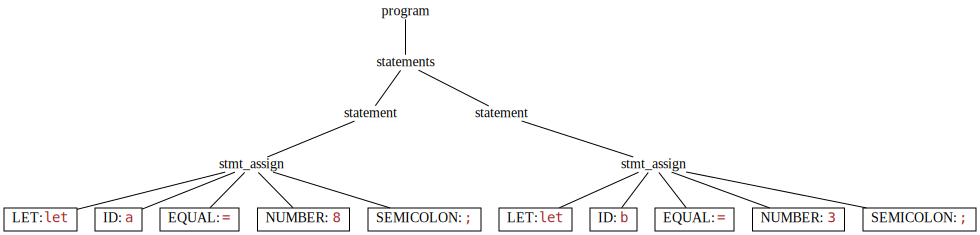

In [ ]:
draw(tree)

เมื่อพิจารณาเฉพาะโหนดใบจะเห็นได้ว่าอักขระสีแดงนั้นคือคือข้อความในอินพุทตั้งต้นที่ตัด whitespace ออกไปแล้ว เล็กเซอร์ที่ Lark สร้างให้ทำหน้าที่จับกลุ่มอักขระในข้อความออกมาเป็นสายของโทเค็น พร้อมระบุประเภท (type) และค่า (lexeme) กำกับไว้ให้กับแต่ละโทเค็น จากนั้นจึงส่งต่อให้กับส่วนพาร์เซอร์ที่ทำหน้าที่นำเอาโทเค็นเหล่านี้มาประกอบกันเป็นโครงสร้างตามกฎของแกรมมาร์ จนกระทั่งได้โครงสร้างของโปรแกรมที่สมบูรณ์ออกมาตามกฎ `program` ในที่สุด

ตามที่ได้กล่าวไปแล้วว่าโดยปกติ Lark จะตัดโทเค็นที่เราไม่ได้ระบุชื่อออกจากพาร์ซทรีหากไม่ได้ระบุอาร์กิวเมนต์ `keep_all_tokens` เป็น true เอาไว้ ซึ่งจะทำให้ได้พาร์ซทรีมีลักษณะด้านล่าง

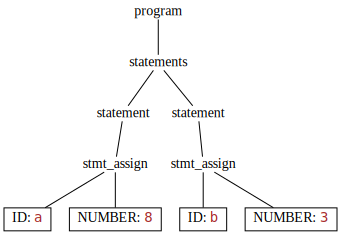

In [ ]:
parser01 = Lark(JOY01_GRAMMAR, start='program')  # default: keep_all_tokens=False
tree = parser01.parse('let a = 8; let b = 3;')
draw(tree)

พาร์ซทรีที่ได้แม้จะมีโทเค็นบางส่วนหายไป แต่โทเค็นเหล่านั้นไม่จำเป็นอีกต่อไป เนื่องจากเราตีความอินพุทได้โดยอาศัยโครงสร้างของพาร์ซทรีอยู่แล้ว ตัวอย่างเช่นเราเห็นว่าโทเค็น `ID:a` และ `NUMBER:8` นั้นเป็นส่วนหนึ่งของโหนด `stmt_assign` ทำให้เราใช้ข้อมูลนี้ตีความได้ว่าเป็นกำหนดค่าตัวแปร `a` ให้เป็น 8 แม้จะไม่มีโทเค็น `let`, `=` และ `;` อยู่ในผลลัพธ์แล้วก็ตาม

การทำแบบนี้ทำให้โทเค็นที่เหลืออยู่เป็นโทเค็นที่จำเป็นจริง ๆ เท่านั้น จึงช่วยให้กระบวนการท่องพาร์ซทรีทำได้สะดวกขึ้น หากโทเค็นที่จำเป็นหายไปแสดงว่าแกรมมาร์ที่นิยามไว้ยังไม่เหมาะสม

## ท่องไปในพาร์ซทรี
ขั้นตอนต่อไปคือการท่องไปในพาร์ซทรีเพื่อประมวลผลโครงสร้างย่อยแต่ละส่วน เรามาดูการเข้าถึงแอตทริบิวต์ (attribute - คุณสมบัติ) ต่าง ๆ ของพาร์ซทรีกันก่อน

เราสามารถตรวจสอบชื่อกฎได้จากแอตทริบิวต์ `data`

In [ ]:
tree.data

'program'

โหนดลูกของทรีทั้งหมดเก็บอยู่ในแอตทริบิวต์ `children` ในรูปลิสต์

In [ ]:
tree.children

[Tree('statements', [Tree('statement', [Tree('stmt_assign', [Token('ID', 'a'), Token('NUMBER', '8')])]), Tree('statement', [Tree('stmt_assign', [Token('ID', 'b'), Token('NUMBER', '3')])])])]

สมาชิกแต่ละตัวของ `tree.children` ต่างก็เป็นทรีเช่นกัน อย่างเช่น `tree.children[0].children[1].children[0]` จะเป็นการอ้างถึงทรีที่เริ่มต้นจากโหนด `stmt_assign` ฝั่งขวา

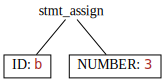

In [ ]:
subtree = tree.children[0].children[1].children[0]
draw(subtree)

สุดท้ายคือโหนดใบที่แทนโทเค็นแต่ละตัว เราเข้าถึงชนิดของโทเค็นและค่าของโทเค็นได้จากแอตทริบิวต์ `type` และ `value` ตามลำดับ

In [ ]:
token = subtree.children[0]  # โหนด ID:b
draw(token)
print('type =', token.type)
print('value =', token.value)

type = ID
value = b


เนื่องจากพาร์ซทรีมีโครงสร้างแบบรีเคอร์ซีฟ จึงเหมาะที่จะใช้โค้ดแบบรีเคอร์ซีฟมาประมวลผล โค้ดที่ตีความพาร์ซทรีแบบตรงไปตรงมาจึงอาจจะอยู่ในรูป if หลาย ๆ ชั้น คล้ายกับตัวอย่างด้านล่าง

```python
def visit(tree):
  if tree.data == 'program':
    visit(tree.children[0])   # visit 'statements'
  elif tree.data == 'statements':
    for c in tree.children:   # visit each 'statement' in 'statements'
      visit(c)
  elif tree.data == 'statement':
      visit(tree.children[0]) # visit the only child of this 'statement'
  elif tree.data == 'stmt_assign':
    # generate code for this assignment statement node
```

อย่างไรก็ตาม เราจะไม่เขียนโปรแกรมในรูปแบบ if หลายชั้นข้างต้น แต่จะอาศัยกลไกของการโปรแกรมเชิงวัตถุ (OOP) ในการเพิ่มขยายฟีเจอร์ของตัวคอมไพเลอร์ไปทีละขั้น

## ท่องพาร์ซทรีสไตล์ OOP

วิธีการที่เราเลือกใช้จะอาศัยความสามารถในการต่อยอดของการโปรแกรมเชิงวัตถุ เพื่อจะได้เพิ่มฟีเจอร์ของคอมไพเลอร์เข้าไปได้เรื่อย ๆ โดยไม่ต้องมานิยามฟังก์ชัน `visit()` ใหม่ซ้ำแล้วซ้ำอีก

เราจะเริ่มจากการนิยามคลาสพื้นฐานชื่อ `BaseVisitor` เอาไว้ คลาสนี้มีเพียงเมท็อด `visit()` ที่เมื่อเรียกแล้วจะวนเรียก `visit()` กับโหนดลูกที่ไม่ใช่โหนดใบจนครบทุกตัว แต่ยังไม่สร้างผลลัพธ์ใด ๆ ออกมา เพื่อให้เราสามารถระบุโค้ดสำหรับประมวลผลโหนดแต่ละประเภทผ่านการทำซับคลาส
เราจะออกแบบให้เมท็อด `visit()` ตรวจสอบว่าภายในคลาสนั้นมีเมท็อดที่ชื่อเดียวกับชื่อโหนดหรือไม่ หากพบว่ามีจะเรียกเมท็อดนั้นมาเป็นตัวประมวลผลโหนดแทน

คลาส `BaseVisitor` มีนิยามตามโค้ดด้านล่าง

In [ ]:
from lark.tree import Tree

class BaseVisitor:
    def visit(self, tree):
        # ค้นหาเมท็อดที่ชื่อเดียวกับชื่อโหนด
        if hasattr(self, tree.data):
            # พบเมท็อด ให้เรียกเมท็อดนั้นประมวลผลโหนด
            method = getattr(self, tree.data)
            return method(tree)
        else:
            # ไม่พบเมท็อด เรียก visit() กับลูกทุกตัวที่เป็น non-terminal
            for c in tree.children:
                if isinstance(c, Tree):
                    self.visit(c)

การจะทำให้กระบวนการท่องพาร์ซทรีเกิดผลลัพธ์ขึ้นมาต้องสร้างซับคลาสจากคลาส `BaseVisitor` แล้วนิยามเมท็อดให้มีชื่อเดียวกันกับชื่อโหนดที่ต้องการประมวลผล ตัวอย่างเช่น

In [ ]:
class Visitor(BaseVisitor):
    def program(self, tree):
        print('program node')
        self.visit(tree.children[0])  # 'program' has only one child

    def stmt_assign(self, tree):
        [id, number] = tree.children
        print(f'stmt_assign node: id={id.value}, number={number.value}')

visitor = Visitor()
visitor.visit(tree)

program node
stmt_assign node: id=a, number=8
stmt_assign node: id=b, number=3


เห็นได้ว่าเมื่อสั่ง `visitor.visit(tree)` เมท็อด `program()` จะถูกเรียกโดยอัตโนมัติเมื่อกำลังประมวลผลโหนด `program` จึงมีการพิมพ์ข้อความ `program node` ออกมา ในทำนองเดียวกัน เมท็อด `stmt_assign()` จะถูกเรียกเมื่อกำลังประมวลผลโหนด `stmt_assign` เราจึงแน่ใจว่าโหนดนี้จะมีลูก 2 ตัวคือโทเค็น ID และโทเค็น NUMBER และสามารถดึงออกมาแสดงผลตามที่เห็นได้

สังเกตว่าเมท็อด `program()` มีการเรียก `visit()` ด้วยตนเองกับลูกของโหนด `program` ทั้งหมดด้วยลูป `for` เพราะถ้าหากไม่เรียก `visit()` กับโหนดลูกต่อ การท่องกิ่งของพาร์ซทรีจะสิ้นสุดลงที่โหนดนั้น ๆ

ข้อสังเกตอีกจุดหนึ่งคือคลาส `Visitor` ไม่ได้นิยามเมท็อดเอาไว้ครบทุกกฎของแกรมมาร์ แต่ที่ยังทำงานได้เนื่องจากเมท็อด `visit()` ของคลาส `BaseVisitor` ระบุเอาไว้ว่าหากกำลังประมวลผลโหนดที่ไม่มีเมท็อดนิยามเอาไว้ให้ (เช่นโหนด `statements` หรือ `statement`) โหนดลูกทุกตัวจะถูกประมวลผลต่อโดยอัตโนมัติ

## สร้างโค้ด Hack Assembly

ในตอนนี้เราสามารถนิยามซับคลาสจากคลาส `BaseVisitor` เพื่อสร้างโค้ดเจเนอเรเตอร์ให้กับ Joy 0.1 ได้แล้ว ในคลาส `CodeGen01` ด้านล่างเราจะนิยามตัวแปรสมาชิก `_asm` ขึ้นมาเพื่อเก็บสะสมโค้ดภาษาแอสเซมบลี้ที่ถูกสร้างขึ้นระหว่างการท่องพาร์ซทรี

เนื่องจาก Joy 0.1 รองรับคำสั่งเพียงรูปแบบเดียวคือ `stmt_assign` ส่วนที่สร้างโค้ดจึงอยู่ในเมท็อด `stmt_assign()` เป็นหลัก ซึ่งทำหน้าที่ดึงโทเค็น `ID` และ `NUMBER` ออกมาจากโหนดลูก (อย่าลืมว่าโหนด `stmt_assign` มีลูกสองตัว หากจำไม่ได้ให้ย้อนกลับไปดูพาร์ซทรี) และเรียกใช้ `gen_load_const()` ที่เป็น pseudo-instruction ที่เตรียมไว้ตั้งแต่แรก เพื่อสร้างโค้ดภาษาแอสเซมบลี้ที่โหลดค่าคงที่ตามค่าในโทเค็น `NUMBER` ลงในตัวแปรที่มีชื่อตามที่ระบุในโทเค็น `ID`

โค้ดภาษาแอสเซมบลี้ที่ได้จะถูกบรรจุไว้ในตัวแปรสมาชิก `_asm` หลังจากเรียก `visit()` แล้วเราจึงเอาโค้ดเหล่านี้มาประกอบรวมกันเป็นโปรแกรมใหญ่โปรแกรมเดียว​

In [ ]:
class CodeGen01(BaseVisitor):
    def __init__(self):
        self._asm = []  # for storing generated instructions

    def stmt_assign(self, tree):
        [id, number] = tree.children
        number = int(number)
        self._asm.append(gen_load_const(id, number))

codegen01 = CodeGen01()
codegen01.visit(tree)
asm = '\n'.join(codegen01._asm)
listing(asm)

// [a] <- 8
   0: @8
   1: D=A
   2: @a
   3: M=D
// [b] <- 3
   4: @3
   5: D=A
   6: @b
   7: M=D


ทดลองรันในซิมูเลชัน

In [ ]:
assemble_and_simulate(asm, memory_display_slots=20)

## รวมร่าง Joy 0.1

การเขียนโค้ดแบบข้างต้นแม้จะคอมไพล์และสร้างโค้ดภาษาแอสเซมบลี้ออกมาได้อย่างถูกต้อง แต่ส่วนของแกรมมาร์ พาร์เซอร์ และโค้ดเจเนอเรเตอร์ ยังถูกนิยามกันอยู่อย่างกระจัดกระจาย เพื่อจัดโค้ดให้เป็นระเบียบ เราจะผนวกการนิยามแกรมมาร์ และโค้ดส่วนพาร์เซอร์ เอาไว้ในคลาสเดียวกันกับโค้ดเจเนอเรเตอร์ โดยสร้างเป็นคลาสใหม่ที่มีชื่อว่า `Joy01` ที่ภายในมีเมท็อด `parse()` สำหรับสร้างพาร์ซทรี และเมท็อด `compile()` สำหรับสร้างโค้ด Hack Assembly พร้อมทั้งนำฟังก์ชัน `gen_load_const()` และ `gen_move()` สำหรับ pseudo-instruction ที่นิยามไว้ก่อนหน้านี้มาทำเป็นเมท็อดเพื่อป้อนโค้ดลงไปในลิสต์ `_asm` โดยตรง

In [ ]:
class Joy01(BaseVisitor):

    GRAMMAR = r'''
        program: statements
        statements: statement*
        statement: stmt_assign
        stmt_assign: "let" ID "=" NUMBER ";"

        ID: /[_A-Za-z][_0-9A-Za-z]*/
        NUMBER: /[0-9]+/
        WS: /[ \t\f\r\n]+/
        %ignore WS
    '''

    def __init__(self):
        self._asm = []  # for storing generated instructions
        self._parser = Lark(self.GRAMMAR, start='program')

    def parse(self, code):
        'Generate a parse tree from the specified Joy code'
        return self._parser.parse(code)

    def compile(self, code):
        'Generate Hack Assembly from the specified Joy code'
        tree = self.parse(code)
        self.visit(tree)
        return '\n'.join(self._asm)

    def gen_load_const(self, mem, val):
        '''
        Generate Hack assembly to load the memory location mem with the specified
        integer val, where 0 <= val <= 32767.
        '''
        if val < 0 or val > 32767:
            raise Exception("Invalid integer literal")
        self._asm.append(f'''
            // [{mem}] <- {val}
            @{val}
            D=A
            @{mem}
            M=D
        ''')

    def gen_move(self, dst, src):
        '''
        Generate Hack assembly to copy the memory location src to the memory
        location dst.
        '''
        self._asm.append(f'''
            // [{dst}] <- [{src}]
            @{src}
            D=M
            @{dst}
            M=D
        ''')

    def stmt_assign(self, tree):
        [id, number] = tree.children
        number = int(number)
        self.gen_load_const(id, number)

ทดลองเรียกใช้ Joy01 ให้คอมไพล์โค้ดเดิม โค้ดแอสเซมบลี้ผลลัพธ์ควรเหมือนเดิมทุกประการ

In [ ]:
asm = Joy01().compile('let a = 8; let b = 3;')
assemble_and_simulate(asm)

## สร้างตัวทดสอบ

คลาส `TestJoyBase` เตรียมกลไกพื้นฐานสำหรับทดสอบ Joy Compiler โดยออกแบบให้ง่ายต่อการระบุคลาสของคอมไพเลอร์ที่ต้องการทดสอบ และสะดวกในการสร้างคลาสทดสอบใหม่ที่ต่อยอดจากคลาสทดสอบเดิม

In [ ]:
class TestJoyBase(unittest.TestCase):

    JOY_COMPILER = None

    def setUp(self):
        self.cpu = PureHackCPU()
        if self.JOY_COMPILER is None:
            raise Exception('Please define "JOY_COMPILER" as a class member.')

    def compile_and_run(self, code, max_steps=50000):
        self.cpu.reset()
        asm = self.JOY_COMPILER().compile(code)
        instrs = assemble(asm)
        self.cpu.load_instructions(instrs)
        self.cpu.run(max_steps, output_traces=False, until_pc=len(instrs))

## Test case

นำ `TestJoyBase` มาสร้างตัวทดสอบสำหรับ Joy 0.1 และลองรันดังนี้

In [ ]:
class TestJoy01(TestJoyBase):

    JOY_COMPILER = Joy01

    def test_assign(self):
        self.compile_and_run('''
            let a = 3;
            let b = 8;
        ''')
        self.assertEqual(self.cpu.ram[16], 3)
        self.assertEqual(self.cpu.ram[17], 8)

run_test(TestJoy01)

.
----------------------------------------------------------------------
Ran 1 test in 0.012s

OK


# Joy 0.2 - variable expression

Joy 0.2 รองรับทุกฟีเจอร์ของ Joy 0.1 โดยมีฟีเจอร์เพิ่มเติมดังนี้

---
* คำสั่ง `let` รองรับการระบุค่าเป็นนิพจน์ ตามรูปแบบ: `let` *var* `=` *expr* `;` โดย *expr* รองรับรูปแบบดังนี้
    * นิพจน์ค่าคงที่: *constant*
    * นิพจน์ตัวแปร: *id*
* ป้องกันการเข้าถึงหน่วยความจำในตำแหน่งพิเศษโดยตรงผ่านตัวแปรที่มีชื่อเดียวกัน เช่น SP, R0, R1 ฯลฯ
---

เราเริ่มจากการนิยามแกรมมาร์ให้ Joy 0.2 กันก่อน สังเกตกฎ `stmt_assign` ที่เปลี่ยนไป และกลุ่มของกฎ `expr` ที่เพิ่มเข้ามาเพื่อรองรับนิพจน์แบบค่าคงที่และแบบตัวแปร


In [ ]:
class Joy02(Joy01):

    GRAMMAR = r'''
        program: statements
        statements: statement*
        statement: stmt_assign
        stmt_assign: "let" ID "=" expr ";"
        expr: expr_const
            | expr_id
        expr_const: NUMBER
        expr_id: ID

        ID: /[_A-Za-z][_0-9A-Za-z]*/
        NUMBER: /[0-9]+/
        WS: /[ \t\f\r\n]+/
        %ignore WS
    '''

เนื่องจากคลาส Joy02 เป็นซับคลาสของ Joy01 เมท็อดทุกตัวที่นิยามเอาไว้ใน Joy01 จึงสามารถนำมาใช้ต่อใน Joy02 ได้ทันที ลองสร้างพาร์ซทรีจากโค้ดตัวอย่างเพื่อนำมาพิจารณาวิเคราะห์โครงสร้าง

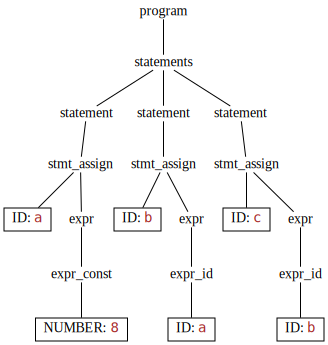

In [ ]:
tree = Joy02().parse('''
    let a = 8;
    let b = a;
    let c = b;
''')
draw(tree)

ในเฟสต่อ ๆ ไปนั้น *expr* สามารถปรากฏอยู่ได้หลากหลายจุดในโปรแกรม เช่น ใช้เป็นส่วนหนึ่งของโครงสร้าง if หรือเป็นส่วนของนิพจน์ที่ซับซ้อนมากขึ้น เพื่อให้เชื่อมต่อกับโครงสร้างอื่นได้สะดวก เราจะประมวลผลโหนด *expr* โดยเจเนอเรทโค้ดให้นำผลลัพธ์ของ *expr* มาเก็บไว้ที่หน่วยความจำตำแหน่ง `THIS` (หรือ `R3`) เสมอ สังเกตจากตัวอย่างเมท็อด `expr_const()` และ `expr_id()` ของ Joy 0.2 ด้านล่าง

In [ ]:
class Joy02(Joy01):

    GRAMMAR = r'''
        program: statements
        statements: statement*
        statement: stmt_assign
        stmt_assign: "let" ID "=" expr ";"
        expr: expr_const
            | expr_id
        expr_const: NUMBER
        expr_id: ID

        ID: /[_A-Za-z][_0-9A-Za-z]*/
        NUMBER: /[0-9]+/
        WS: /[ \t\f\r\n]+/
        %ignore WS
    '''

    # override Joy01's stmt_assign
    def stmt_assign(self, tree):
        [id, expr] = tree.children
        self.visit(expr)
        # THIS should store expr's value; move it to id
        self.gen_move(f'.var.{id}', 'THIS')

    def expr_const(self, tree):
        [const] = tree.children
        value = int(const)
        self.gen_load_const('THIS', value)

    def expr_id(self, tree):
        [id] = tree.children
        # make THIS store the value referenced by id
        self.gen_move('THIS', f'.var.{id}')

ลองทดสอบกับโค้ดตัวอย่าง สังเกตว่าคำสั่งกำหนดค่าคงที่ให้ตัวแปรนั้นถูกแปลเป็นโค้ดแอสเซมบลี้ที่แตกต่างไปจาก Joy 0.1 โดยเป็นการนำค่าคงที่ใส่ลงใน `THIS` ก่อนแล้วจึงคัดลอกลงในตำแหน่งตัวแปร แทนที่จะกำหนดค่าลงในตัวแปรโดยตรง

การสร้างโค้ดลักษณะนี้แม้จะดูอ้อมค้อม แต่ช่วยให้เราเขียนตัวสร้างโค้ดในการกำหนดค่าตัวแปรได้ง่ายขึ้น ตราบเท่าที่เราสร้างโค้ดโดยยึดตามข้อตกลงว่าค่าผลลัพธ์ที่ได้จากนิพจน์จะถูกทิ้งไว้ในหน่วยความจำ `THIS` โค้ดสำหรับกำหนดค่าให้ตัวแปรจะเป็นเพียงการดึงค่าจาก `THIS` ไปไว้ในตัวแปรนั้น ๆ เท่านั้น ไม่ว่านิพจน์ที่นำมากำหนดค่าให้กับตัวแปรจะอยู่ในรูปใดหรือซับซ้อนเพียงใดก็ตาม

In [ ]:
asm = Joy02().compile('''
    let a = 8;
    let b = a;
    let c = b;
''')
assemble_and_simulate(asm)

## Test case

รันตัวทดสอบกับคลาส Joy02 ซึ่งต่อยอดมาจากตัวทดสอบของ Joy01 ตัวทดสอบนี้จึงนำกรณีทดสอบของ Joy01 ทุกตัวมาทดสอบด้วย Joy02 โดยอัตโนมัติ

In [ ]:
class TestJoy02(TestJoy01):

    JOY_COMPILER = Joy02

    def test_expr_constant(self):
        self.compile_and_run('''
            let a = 3;
            let b = 5;
        ''')
        self.assertEqual(self.cpu.ram[16], 3)
        self.assertEqual(self.cpu.ram[17], 5)

    def test_expr_id(self):
        self.compile_and_run('''
            let a = 3;
            let b = a;
        ''')
        self.assertEqual(self.cpu.ram[16], 3)
        self.assertEqual(self.cpu.ram[17], 3)

    def test_expr_avoid_predefined_symbol(self):
        self.compile_and_run('''
            let R6 = 100;
            let R14 = 123;
        ''')
        self.assertEqual(self.cpu.ram[6], 0)    # R6
        self.assertEqual(self.cpu.ram[14], 0)   # R14
        self.assertEqual(self.cpu.ram[16], 100)
        self.assertEqual(self.cpu.ram[17], 123)

run_test(TestJoy02)

....
----------------------------------------------------------------------
Ran 4 tests in 0.045s

OK


# Joy 0.3 - if statement
Joy 0.3 รองรับทุกฟีเจอร์ของ Joy 0.2 โดยมีฟีเจอร์เพิ่มเติมดังนี้

---
* รองรับการทำ flow control ในรูปแบบ: `if` *expr* `{` *statements* `}` โดยทำ *statements* เมื่อ *expr* มีค่าที่ไม่เท่ากับ 0
---

เป็นที่ทราบดีว่าโครงสร้าง `if` มีการทำงานตามโฟลว์ชาร์ท

![flowchart-if.png](https://ecourse.cpe.ku.ac.th/courses/comsys/pics/flowchart-if.png)

ซึ่งสามารถสร้างเป็นโค้ดแอสเซมบลี้อย่างตรงไปตรงมาดังนี้

```
* สร้างโค้ดคำนวณค่าให้ expr (ซึ่งเก็บผลลัพธ์ใน THIS ตามข้อตกลง)
  :
* สร้างโค้ดตรวจสอบค่า THIS หากเป็นศูนย์ให้กระโดดข้ามไปยังลาเบลที่วางปิดท้ายเอาไว้
* สร้างโค้ดที่แปลจากคำสั่งใน if body
  :
* สร้างลาเบลปิดท้าย if
```

สิ่งหนึ่งที่ต้องระวังคือลาเบลสำหรับการกระโดดต้องไม่ซ้ำกับลาเบลอื่นในโค้ด

คลาส Joy03 ด้านล่างมีการปรับปรุงแกรมมาร์เพิ่มเติมจาก Joy02 โดยเพิ่มนิยามกฎ `stmt_if` ลงไป และแก้กฎ `statement` ให้รองรับกฎ `stmt_if` เพิ่มเติม
ส่วนของโค้ดเจเนอเรเตอร์มีการสร้างเมท็อด `stmt_if` สำหรับแปลโครงสร้าง `if` และมีการกำหนดตัวแปรสมาชิก `_label_count` ให้กับคลาสสำหรับติดตามและกำหนดหมายเลขให้ลาเบลไม่ให้ซ้ำซ้อน

ในโค้ดแอสเซมบลี้ที่สร้างออกมายังมีการใส่คอมเม้นต์ไว้ตามจุดต่าง ๆ เพื่อช่วยในการดีบักโปรแกรม

In [ ]:
class Joy03(Joy02):

    GRAMMAR = r'''
        program: statements
        statements: statement*
        statement: stmt_assign
                 | stmt_if
        stmt_assign: "let" ID "=" expr ";"
        stmt_if: "if" expr "{" statements "}"
        expr: expr_const
            | expr_id
        expr_const: NUMBER
        expr_id: ID

        ID: /[_A-Za-z][_0-9A-Za-z]*/
        NUMBER: /[0-9]+/
        WS: /[ \t\f\r\n]+/
        %ignore WS
    '''

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self._label_count = 0  # keep track of generated jump labels

    def gen_label_no(self):
        self._label_count += 1
        return self._label_count

    def stmt_if(self, tree):
        [expr, if_body] = tree.children
        label = self.gen_label_no()
        self._asm.append(f'''
            //## begin-if-{label} ##
        ''')
        self.visit(expr)
        # expr result is in THIS; if it is zero, jump over the body to the end-if label
        self._asm.append(f'''
            @THIS
            D=M
            @.endif.{label}
            D;JEQ
        ''')
        # generate the body by visiting the statements node
        self._asm.append(f'''
            //## if-body-{label} ##
        ''')
        self.visit(if_body)
        # place the end-if label here
        self._asm.append(f'''
            //## end-if-{label} ##
            (.endif.{label})
        ''')

ลองสร้างพาร์ซทรีจากโค้ดตัวอย่างเพื่อตรวจสอบว่าโหนด `stmt_if` ประกอบด้วยโหนดลูกอะไรบ้าง เพื่อจะได้ทำความเข้าใจโค้ดใน `stmt_if()` ด้านบนได้ง่ายขึ้น

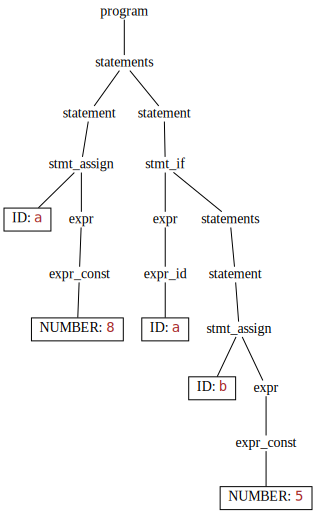

In [ ]:
tree = Joy03().parse('''
    let a = 8;
    if a {
        let b = 5;
    }
''')
draw(tree)

รันโค้ดตัวอย่างเพื่อทดสอบ ทดลองเปลี่ยนค่า `a` ให้เป็น 0 หรือค่าอื่นเพื่อดูลำดับการทำงานของโปรแกรม

In [ ]:
asm = Joy03().compile('''
    let a = 1;
    if a {
        let b = 5;
    }
''')
assemble_and_simulate(asm)

## Test case

รันตัวทดสอบ สังเกตว่า Joy 0.3 ต้องสามารถรองรับโครงสร้าง if ซ้อนกัน (nested if) ได้ด้วย

**หมายเหตุ:** การใช้ `{{` และ `}}` ในโค้ดทดสอบนั้นไม่เกี่ยวกับภาษา Joy แต่อย่างใด **แต่ใช้ในการสร้างสตริงต้นแบบเพื่อเรียกใช้ในภาษาไพทอนโดยเมท็อด** `format()`

In [ ]:
class TestJoy03(TestJoy02):

    JOY_COMPILER = Joy03

    def test_stmt_if_true(self):
        self.compile_and_run('''
            let a = 8;
            let b = 2;
            if a {
                let b = 20;
            }
        ''')
        self.assertEqual(self.cpu.ram[17], 20)

    def test_stmt_if_false(self):
        self.compile_and_run('''
            let a = 0;
            let b = 2;
            if a {
                let b = 20;
            }
        ''')
        self.assertEqual(self.cpu.ram[17], 2)

    def test_stmt_if_nested(self):
        template = '''
            let a = {a};
            let b = {b};
            let c = 999;
            if a {{
                let c = 1;
                if b {{
                    let c = 2;
                }}
            }}
        '''
        self.compile_and_run(template.format(a=0, b=0))
        self.assertEqual(self.cpu.ram[18], 999)
        self.compile_and_run(template.format(a=1, b=0))
        self.assertEqual(self.cpu.ram[18], 1)
        self.compile_and_run(template.format(a=1, b=1))
        self.assertEqual(self.cpu.ram[18], 2)

run_test(TestJoy03)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.112s

OK


# Joy 0.4 - 16-bit constant

Joy 0.4 รองรับฟีเจอร์ทั้งหมดของ Joy 0.3 และเพิ่มฟีเจอร์ดังนี้

---
* รองรับการกำหนดค่าคงที่แบบจำนวนเต็มลบ​
* รองรับการกำหนดค่าคงที่แบบจำนวนเต็มที่มากกว่า 32767
---

แกรมมาร์ของ Joy 0.3 นิยามโทเค็น NUMBER ที่รับเฉพาะจำนวนเต็มบวก
ให้นิสิตแก้ไขแกรมมาร์ของ Joy 0.4 โดยกำหนดนิพจน์เรกูล่าร์ให้โทเค็น NUMBER ใหม่ เพื่อให้แมทช์จำนวนเต็มติดลบได้ด้วย

นอกจากนั้นเมท็อด `expr_const()` ที่ผ่านมาอาศัยเมท็อด `gen_load_const()` ในการสร้างโค้ดสำหรับโหลดค่าคงที่ลงในหน่วยความจำตำแหน่ง THIS ผ่าน A-instruction ซึ่งรองรับค่าคงที่เป็นจำนวนเต็มที่มีขนาดไม่เกิน 15 บิต (มีค่าไม่เกิน 32767) และไม่รองรับค่าติดลบ ให้นิสิตนิยามเมท็อด `gen_load_const()` ทับของเดิม ให้รองรับค่าคงที่ได้ตั้งแต่ -32768 ถึง 65535 ได้

## คำใบ้
* อย่าลืมว่าเราทราบค่าของค่าคงที่เหล่านี้ ณ เวลาคอมไพล์ ดังนั้นจึงสามารถเขียนโค้ดไพทอนให้สร้างโค้ดแอสเซมบลี้ที่แตกต่างกันตามเงื่อนไขของค่าคงที่ได้

In [ ]:
def gen_load_const(mem, val):
    '''
    Generate Hack assembly to load the memory location mem with the specified
    integer val, where 0 <= val <= 32767.
    '''
    if val < 0 or val > 32767:
        raise Exception("Invalid integer literal")
    return f'''
        // [{mem}] <- {val}
        @{val}
        D=A
        @{mem}
        M=D
    '''

def gen_move(dst, src):
    '''
    Generate Hack assembly to copy the memory location src to the memory
    location dst.
    '''
    return f'''
        // [{dst}] <- [{src}]
        @{src}
        D=M
        @{dst}
        M=D
    '''

In [ ]:
# DO NOT ERASE THIS CELL - to be graded
class Joy04(Joy03):

    GRAMMAR = r'''
        program: statements
        statements: statement*
        statement: stmt_assign
                 | stmt_if
        stmt_assign: "let" ID "=" expr ";"
        stmt_if: "if" expr "{" statements "}"
        expr: expr_const
            | expr_id
        expr_const: NUMBER
        expr_id: ID

        ID: /[_A-Za-z][_0-9A-Za-z]*/
        NUMBER: /-?[0-9]+/
        WS: /[ \t\f\r\n]+/
        %ignore WS
    '''

    # Override Joy 0.3's gen_load_const()
    def gen_load_const(self, mem, val):
        '''
        Generate Hack assembly to load the memory location mem with the specified
        integer val, where -32768 <= val <= 65535.
        '''
        # put your new code here
        if (0<=val<=32767) :
          self._asm.append(f'''
          //##Normal Number({val})##
          ''')
          self._asm.append(gen_load_const('THIS',val))
        elif (32768<=val<=65535) :
          x = val-32768
          self._asm.append(f'''
          //##High Number({val})##
          @32767
          D=A
          @THIS
          M=D
          @{x}
          D=A
          @THIS
          M=D+M
          M=M+1
          ''')
        elif (val == -32768) :
          self._asm.append(f'''
          //##Specific Negative Number({val})##
          @32767
          D=A
          D=D+1
          D=!D
          D=D+1
          @THIS
          M=D
          ''')

        else :
          val = str(val)
          val = val[1:]
          self._asm.append(f'''
          //##Negative Number({val})##
          @{val}
          D=A
          D=!D
          D=D+1
          @THIS
          M=D
          ''')




In [ ]:
-3%65536

65533

In [ ]:
# พื้นที่ทดสอบ
asm1 = Joy04().compile("""

    let c = -32768;

""")
asm2 = """
@0
"""

asm = Joy04().compile("""
    let a = -3;
    let b = 65535;
    let c = 32768;
    let d = -1;
    let e = -32768;
""")
assemble_and_simulate(asm)

## Test case

In [ ]:
# DO NOT MODIFY
class TestJoy04(TestJoy03):

    JOY_COMPILER = Joy04

    def _check_other_mem(self):
        self.assertEqual(self.cpu.ram[20:30], [0]*10)

    def test_expr_negative_constant(self):
        self.compile_and_run('''
            let a = -3;
            let b = -32766;
            let c = -32767;
            let d = -32768;
        ''')
        self.assertEqual(self.cpu.ram[16], (-3)%65536)
        self.assertEqual(self.cpu.ram[17], (-32766)%65536)
        self.assertEqual(self.cpu.ram[18], (-32767)%65536)
        self.assertEqual(self.cpu.ram[19], (-32768)%65536)
        self._check_other_mem()

    def test_expr_big_constant(self):
        self.compile_and_run('''
            let a = 32768;
            let b = 32769;
            let c = 65534;
            let d = 65535;
        ''')
        self.assertEqual(self.cpu.ram[16], 32768)
        self.assertEqual(self.cpu.ram[17], 32769)
        self.assertEqual(self.cpu.ram[18], 65534)
        self.assertEqual(self.cpu.ram[19], 65535)
        self._check_other_mem()

run_test(TestJoy04)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.208s

OK


# Joy 0.5 - if..else statement
Joy 0.5 รองรับฟีเจอร์ทั้งหมดของ Joy 0.4 และเพิ่มฟีเจอร์ดังนี้

---
* รองรับโครงสร้าง if..else ในรูปแบบ: `if` *expr* `{` *if-statements* `}` `else` `{` *else-statements* `}` โดยที่เมื่อ *expr* ไม่เท่ากับศูนย์ ชุดคำสั่ง *if-statements* จะถูกเรียกทำงาน และเมื่อ *expr* เท่ากับศูนย์ ชุดคำสั่ง *else-statements* จะถูกเรียกทำงาน
---

นิยามคลาส `Joy05` ด้านล่างให้สมบูรณ์ โดยเพิ่มกฎใหม่ลงในแกรมมาร์ให้รองรับโครงสร้าง if..else และเพิ่มเมท็อดใหม่สำหรับสร้างโค้ดให้กับกฎนั้น

**คำใบ้:** แนะนำให้เขียนโฟลว์ชาร์ทของโครงสร้าง if..else ออกมาดูก่อน จะช่วยให้เห็นภาพชัดเจนขึ้นว่าควรวางลาเบลสำหรับกระโดดที่จุดใดบ้าง

In [ ]:
#If a (a=0 JUMP)
#If statement
#(JUMP IF 1)
#Else {statement}

In [ ]:
# DO NOT ERASE - to be graded
class Joy05(Joy04):

    GRAMMAR = r'''
        program: statements
        statements: statement*
        statement: stmt_assign
                 | stmt_if
                 | stmt_if_else
        stmt_assign: "let" ID "=" expr ";"
        stmt_if: "if" expr "{" statements "}"
        stmt_if_else : "if" expr "{" statements "}" "else" "{" statements "}"
        expr: expr_const
            | expr_id
        expr_const: NUMBER
        expr_id: ID

        ID: /[_A-Za-z][_0-9A-Za-z]*/
        NUMBER: /-?[0-9]+/
        WS: /[ \t\f\r\n]+/
        %ignore WS
    '''

    # define a method to handle the new rule in the grammar
    def gen_label_no(self):
        self._label_count += 1
        return self._label_count

    def stmt_if(self, tree):
        [expr, if_body] = tree.children
        label = self.gen_label_no()
        self._asm.append(f'''
            //## begin-if-{label} ##
        ''')
        self.visit(expr)
        # expr result is in THIS; if it is zero, jump over the body to the end-if label
        self._asm.append(f'''
            @THIS
            D=M
            @.endif.{label}
            D;JEQ
        ''')
        # generate the body by visiting the statements node
        self._asm.append(f'''
            //## if-body-{label} ##
        ''')
        self.visit(if_body)
        # place the end-if label here
        self._asm.append(f'''
            //## end-if-{label} ##
            (.endif.{label})
        ''')

    def stmt_if_else(self, tree):
      [expr, if_body,else_body] = tree.children
      label = self.gen_label_no()
      self._asm.append(f'''
          //## begin-if-{label} ##
      ''')
      self.visit(expr)
      print(self.visit(expr))
      # expr result is in THIS; if it is zero, jump over the body to the end-if label
      self._asm.append(f'''
          @THIS
          D=M
          @.endif.{label}
          D;JEQ
      ''')
      # generate the body by visiting the statements node
      self._asm.append(f'''
          //## if-body-{label} ##
      ''')
      self.visit(if_body)
      # place the end-if label here
      self._asm.append(f'''
          @THIS
          D=M
          @.endelse.{label}
          D;JNE
          //## end-if-{label} ##
          (.endif.{label})
      ''')                    #Start Else
      self._asm.append(f'''
      //##else body {label}##
      ''')
      self.visit(else_body)
      self._asm.append(f'''
      //##end else body {label}##
      (.endelse.{label})
      ''')



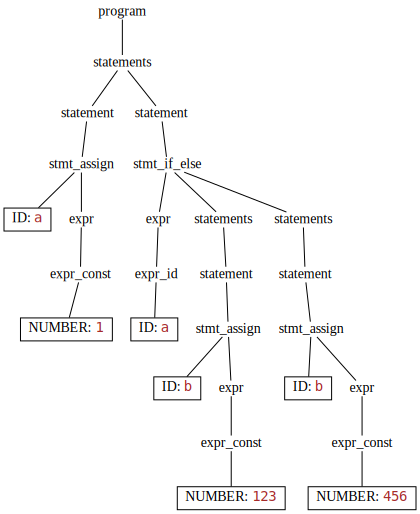

In [ ]:
# พื้นที่ทดสอบ
code = """
    let a = 1;
    if a {
        let b = 123;
    }
    else {
        let b = 456;
    }
"""
draw(Joy05().parse(code))

In [ ]:
# พื้นที่ทดสอบ
asm = Joy05().compile(code)
assemble_and_simulate(asm)

None


## Test case

In [ ]:
# DO NOT MODIFY
class TestJoy05(TestJoy04):

    JOY_COMPILER = Joy05

    def test_if_else(self):
        template = '''
            let a = 0; let b = 0; let c = 0; let d = 0;
            let a = {a};
            let b = {b};
            if a {{
                if b {{
                    let c = 1;
                }}
                else {{
                    let c = 2;
                }}
            }}
            else {{
                if b {{
                    let c = 3;
                }}
                else {{
                    let c = 4;
                }}
            }}
            let d = 1234;
        '''
        for a, b in [(0,0), (0,1), (1,0), (1,1)]:
            if a:
                if b:
                    c = 1
                else:
                    c = 2
            else:
                if b:
                    c = 3
                else:
                    c = 4
            d = 1234

            self.compile_and_run(template.format(a=a, b=b))
            self.assertEqual(self.cpu.ram[16], a)
            self.assertEqual(self.cpu.ram[17], b)
            self.assertEqual(self.cpu.ram[18], c)
            self.assertEqual(self.cpu.ram[19], d)

run_test(TestJoy05)

..........
----------------------------------------------------------------------
Ran 10 tests in 0.197s

OK
